In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

# Importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
# Import data
dataset=pd.read_csv('titanic-passengers.csv',delimiter=';')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
# Data preprocessing

def pre_process(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male':1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes':1,'No':0}},inplace=True)
    return new_data
data=pre_process(dataset)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


# <u>1. Split data</u>

In [4]:
# Features extraction
x=data[['Pclass','Sex','Age','SibSp','Parch','Fare']]
y=data['Survived']

# Splitting data with test dataset 20%

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
57,3,1,70.5,0,0,7.7500
717,3,1,29.0,1,0,7.0458
431,1,0,35.0,1,0,53.1000
633,1,1,28.0,1,0,82.1708
163,3,0,24.0,0,3,19.2583


# <u>2. Applying tree algorithm</u>

In [5]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train) # fitting our model
y_pred=tree.predict(x_test) # evaluating our model
print('score:{}'.format(accuracy_score(y_test,y_pred)))

score:0.770949720670391


# <u>3. Plotting the decision tree</u>

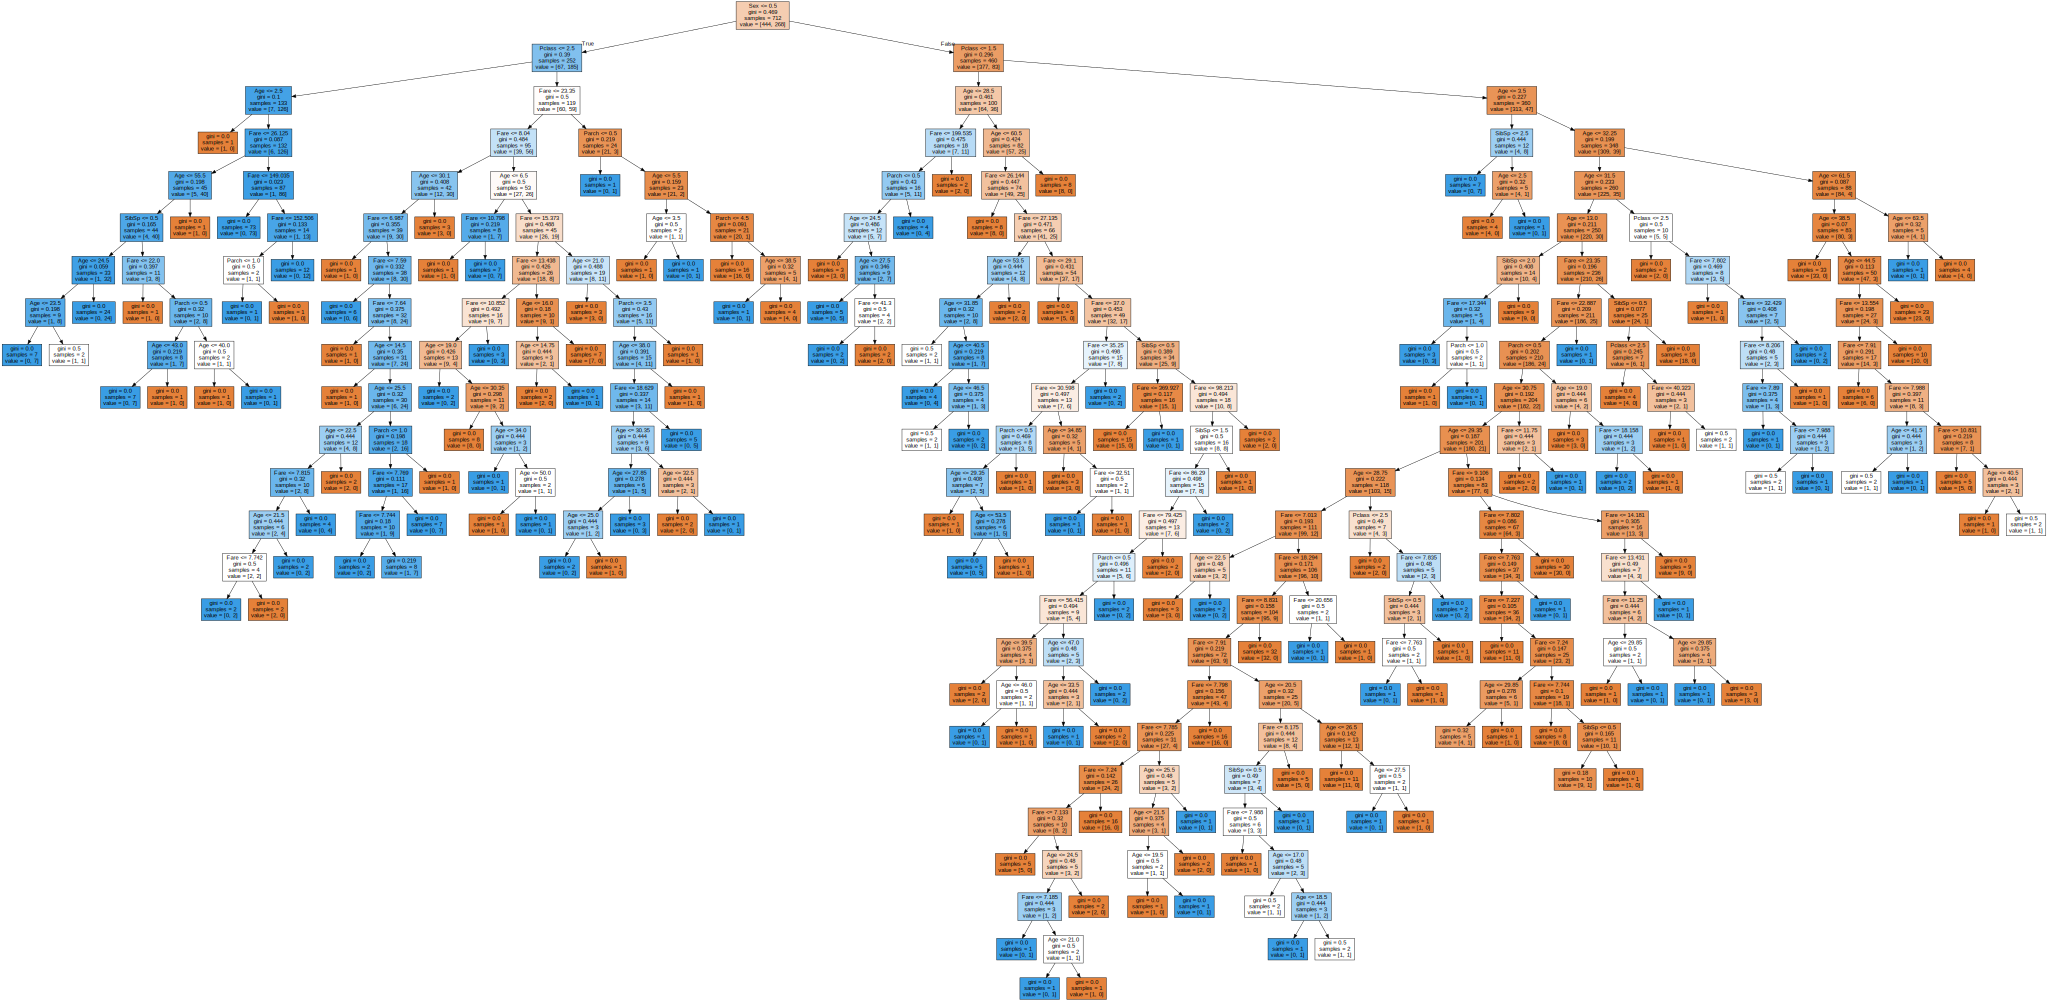

In [6]:
names=['Pclass','Sex','Age','SibSp','Parch','Fare']
dot_data=export_graphviz(tree,out_file=None,filled=True,feature_names=names)
graph=graphviz.Source(dot_data,format='png')
graph.render('data')
graph


# <u>4. Change the decision tree parameters (Pruning)</u>

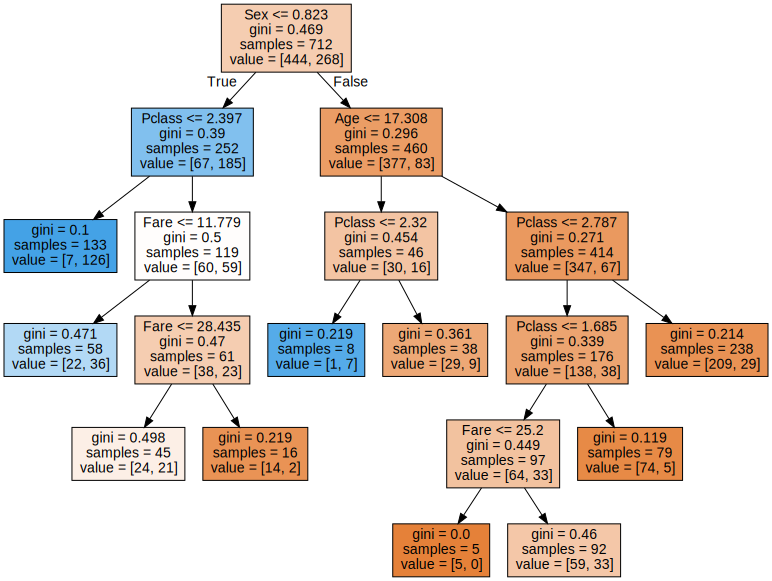

In [11]:
dtree=DecisionTreeClassifier(criterion='gini',splitter='random',max_leaf_nodes=10,min_samples_leaf=5,max_depth=5)
dtree.fit(x_train,y_train)
dot_data1=export_graphviz(dtree,out_file=None,filled=True,feature_names=names)
graph_gini=graphviz.Source(dot_data1,format='png')
graph_gini.render('data')
graph_gini

# <u>5. Calculate the new accuracy</u>

In [8]:
y_pred=dtree.predict(x_test) # evaluating our model
print('score:{}'.format(accuracy_score(y_test,y_pred)))

score:0.8156424581005587


<b>The new accuracy with pruning process is better than the first one.</b>

# <u>6. Use of random forest</u>

In [9]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print('score:{}'.format(accuracy_score(y_test,y_pred)))

score:0.8491620111731844


# <u>7. Random forest with the number of estimators 50</u>

In [10]:
clf=RandomForestClassifier(n_estimators=50)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print('score:{}'.format(accuracy_score(y_test,y_pred)))

score:0.8156424581005587


<b>The accuracy score from the default number of estimators is better than the accuracy from a number of estimators of 50.</b>